<a href="https://colab.research.google.com/github/chewzzz1014/DPhi-Bootcamp/blob/master/notes/deep-learning/examples/Digital_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Levels of Digital Image Processing:
 - **Low-Level**: Inputs & Outputs are images (eg, noise removal and image sharpening)
 - **Mid-Level**: Outputs are attributes extracted from input images (eg, object recognition and image segmentation)
 - **High-Level**: Ensemble of recognition of invidual objects (eg, scene understanfing, autonomous navigation)

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Set Up**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# enabling an upload widget to upload images from device
from google.colab import files

uploaded = files.upload()

Saving Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg to Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg


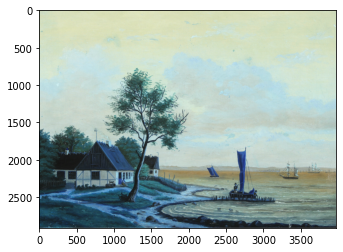

In [4]:
# read the uploaded image
img = cv2.imread("Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg")

# show the image
plt.imshow(img)

In [5]:
# display the images properties: number of pixels and dimension
print(img)

print("Number of Pixels : {}".format(str(img.size)))
print("Shape/Dimensions: {}".format(str(img.shape)))

[[[213 219 184]
  [209 215 180]
  [209 215 180]
  ...
  [207 221 187]
  [208 222 188]
  [208 221 189]]

 [[211 217 182]
  [209 215 180]
  [210 216 181]
  ...
  [207 221 187]
  [208 222 188]
  [209 222 190]]

 [[213 220 185]
  [213 220 185]
  [215 222 187]
  ...
  [206 219 187]
  [209 222 190]
  [208 223 191]]

 ...

 [[ 30  59  74]
  [ 31  60  75]
  [ 31  60  75]
  ...
  [ 29  31  32]
  [ 30  32  33]
  [ 30  32  33]]

 [[ 85 103 114]
  [ 86 104 115]
  [ 86 104 115]
  ...
  [ 78  80  80]
  [ 79  81  81]
  [ 79  81  81]]

 [[224 236 246]
  [226 238 248]
  [226 238 248]
  ...
  [238 240 240]
  [238 240 240]
  [238 240 240]]]
Number of Pixels : 34708128
Shape/Dimensions: (2912, 3973, 3)


**Color Property**

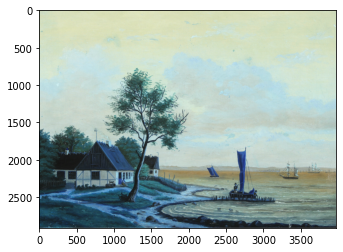

In [7]:
# convert image to RGB color
# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

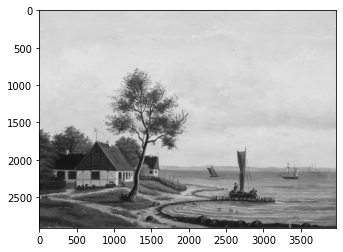

In [8]:
# convert into grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# grayscale -> RGB 
# plt.imshow will require 3d array
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

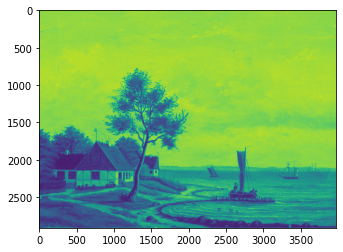

In [10]:
# without convert to 3d array when using plt.imshow()
plt.imshow(gray_img)

**Mean / Average Colour**

In [13]:
# average per row of image
average_color_per_row = np.average(img, axis=0)

# average across average per row
average_color = np.average(average_color_per_row, axis = 0)

# convert to uint8
average_color = np.uint8(average_color)

print(average_color)

[155 175 168]


**Recreate Image from an Existing Image**

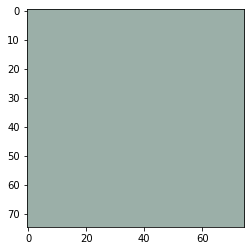

In [15]:
# create 75x75 pixel array with average color value
average_color_img = np.array([[average_color]*75]*75, np.uint8)
plt.imshow(average_color_img)

In [16]:
from google.colab import files

uploaded = files.upload()

Saving brad_pitt.jpg to brad_pitt.jpg


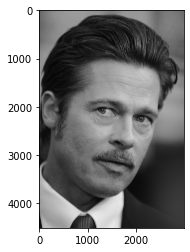

In [17]:
# read image in gray scale
img_gray = cv2.imread("brad_pitt.jpg", 0)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))

In [18]:
# height and weight of the existing image
h, w = img_gray.shape[:2]
print(h, w)

4504 2988


In [20]:
grad_img = np.asarray(img_gray)

#2d array
print(grad_img)

[[ 97  97  97 ... 100 104 106]
 [ 98 100 102 ... 101 104 106]
 [ 97  99 100 ... 104 104 103]
 ...
 [ 13  13  14 ...  52  52  52]
 [ 13  13  13 ...  53  53  52]
 [ 14  15  14 ...  53  53  51]]


In [21]:
# apply gradient ( directional change in the intensity or color in an image)
# substract the next pixel from the current pixel

for i in range(0, h): # across height
  for j in range(0, w-1): # across width
    min_pix_val = min(img_gray[i][j+1], img_gray[i][j])
    if min_pix_val == img_gray[i][j+1]:
      temp_arr = img_gray[i][j] - img_gray[i][j+1]
    else:
      temp_arr = img_gray[i][j+1] - img_gray[i][j]
    grad_img[i, j] = temp_arr


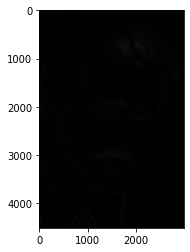

In [22]:
# pillow package
from PIL import Image
gradient_img = Image.fromarray(grad_img)
plt.imshow(gradient_img, cmap="gray")

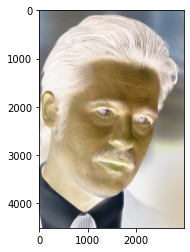

In [24]:
img = cv2.imread("brad_pitt.jpg")
B, G, R = cv2.split(img)

# inverting B, G, R
B[:] = [255-x for x in B]
G[:] = [255-x for x in G]
R[:] = [255-x for x in R]

neg_img = cv2.merge((B, G, R))
plt.imshow(neg_img)

**Thresholding when Converting Image to  Binar Image (with value 0 and 1)**

In [26]:
from google.colab import files

uploaded = files.upload()

Saving upstate-ny.jpg to upstate-ny.jpg


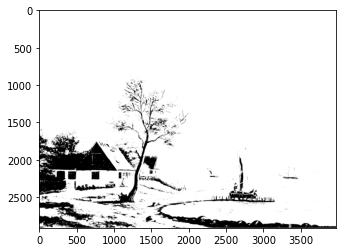

In [32]:
# threshold for grayscale image
# threshold = 60
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_img)

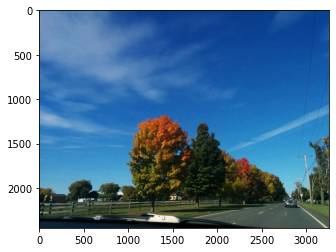

In [34]:
# thresholding in noise removal

# threshold for he channel in blue range
blue_min = np.array([85, 60, 60], np.uint)
blue_max = np.array([150, 255, 255], np.uint)

upstate = cv2.imread("upstate-ny.jpg")

upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

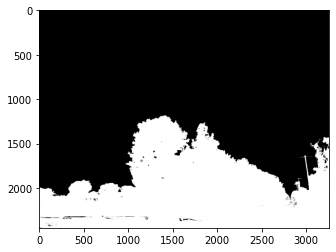

In [35]:
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

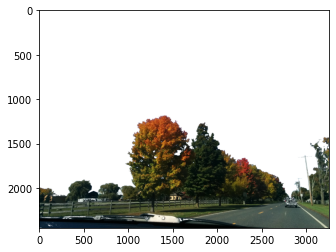

In [37]:
# convert  single channel mask -> 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# bitwise AND on mask to obtain cut-out image that's not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 
                                       1, 
                                       cv2.cvtColor(mask_inverse,cv2.COLOR_GRAY2RGB),
                                       1,
                                       0)
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

**Segmentation**

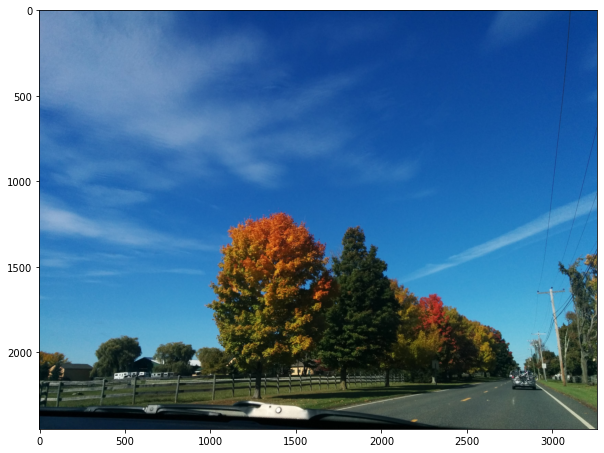

In [38]:
# gaussian blur
img_blur_small = cv2.GaussianBlur(upstate, (5, 5), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

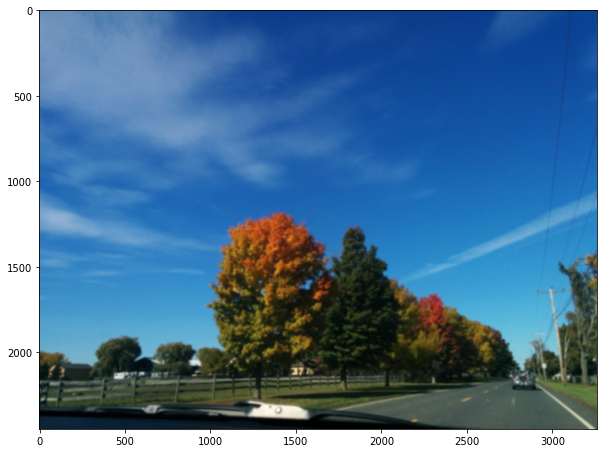

In [39]:
img_blur_small = cv2.GaussianBlur(upstate, (25, 25), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

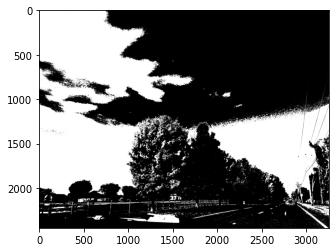

In [40]:
# threshold on regular image
gray_img = cv2.cvtColor(upstate, cv2.COLOR_BGR2GRAY)

_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

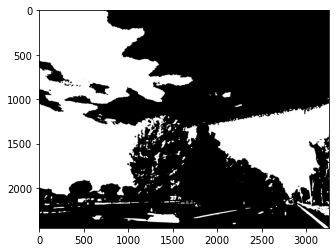

In [41]:
# threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)

_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

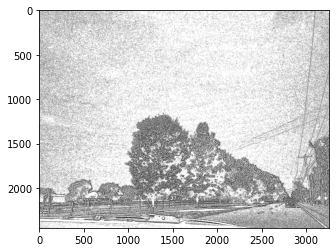

In [42]:
# using adaptive threshold
adaptive_thresh = cv2.adaptiveThreshold(gray_img,
                                        255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        11,
                                        2
                                        )
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))